In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
tips = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/tips.csv")

party_counts = pd.crosstab(tips['day'], tips['size'])

# Como não há muitas pessoas em 1 e 6, usaremos apenas os valores de 2:5
party_counts = party_counts.loc[:, 2:5]

# Nomarlizando para que a soma seja 1 nas linhas axis = 0 (row), axis = 1 (column)
party_pcts = party_counts.div(party_counts.sum(1), axis=0)


tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head(3)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886


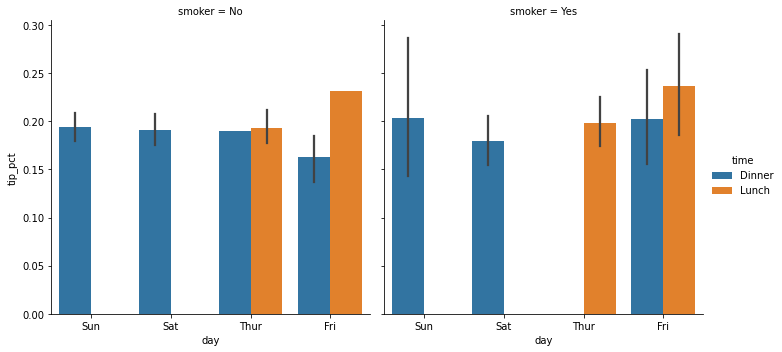

In [10]:
sns.catplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 1], col='smoker', kind='bar')

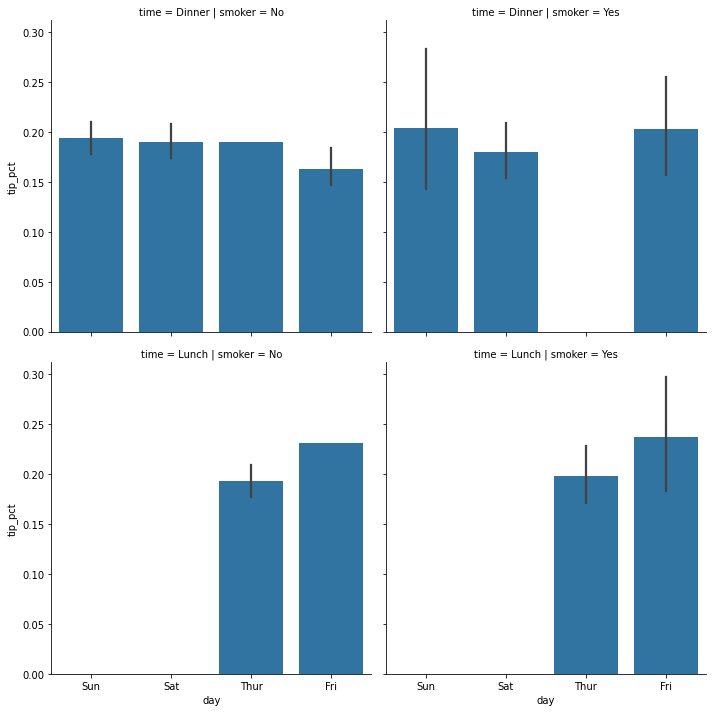

In [11]:
sns.catplot(data=tips[tips.tip_pct < 1], x='day', y='tip_pct', row='time', col='smoker', kind='bar')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

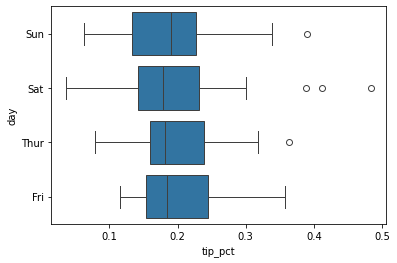

In [13]:
sns.boxplot(data=tips[tips.tip_pct < 0.5], x='tip_pct', y='day')